#EEP 596 Advanced Introduction to Machine Learning
#Programming Assignment 4: NLP GloVe



### Student: Naif A. Ganadily
### Professor: Kartik Mohan

## Diving into Cheat Sheet of Pandas Data Frame
There are some useful functions for solving problems below when it comes to index and slice data frames. Let's go over them.
More materials can be found here: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
1. DataFrame() Construct a dataframe. Use it for putting a numpy ndarray into a dataframe.
1. DataFrame.loc() Purely label-location based indexer for selection by label. Use it for selecting word vectors in the dataframe.     
1. DataFrame.dot() Matrix multiplication with DataFrame. Use it for dot product of word vectors.
1. DataFrame.sort_values() Sort by the values along either axis. Use it for sorting distance short to long.

Below are examples of using these functions. You don't have to code anything in this block, just focus on understanding the functions and how it works in pandas.

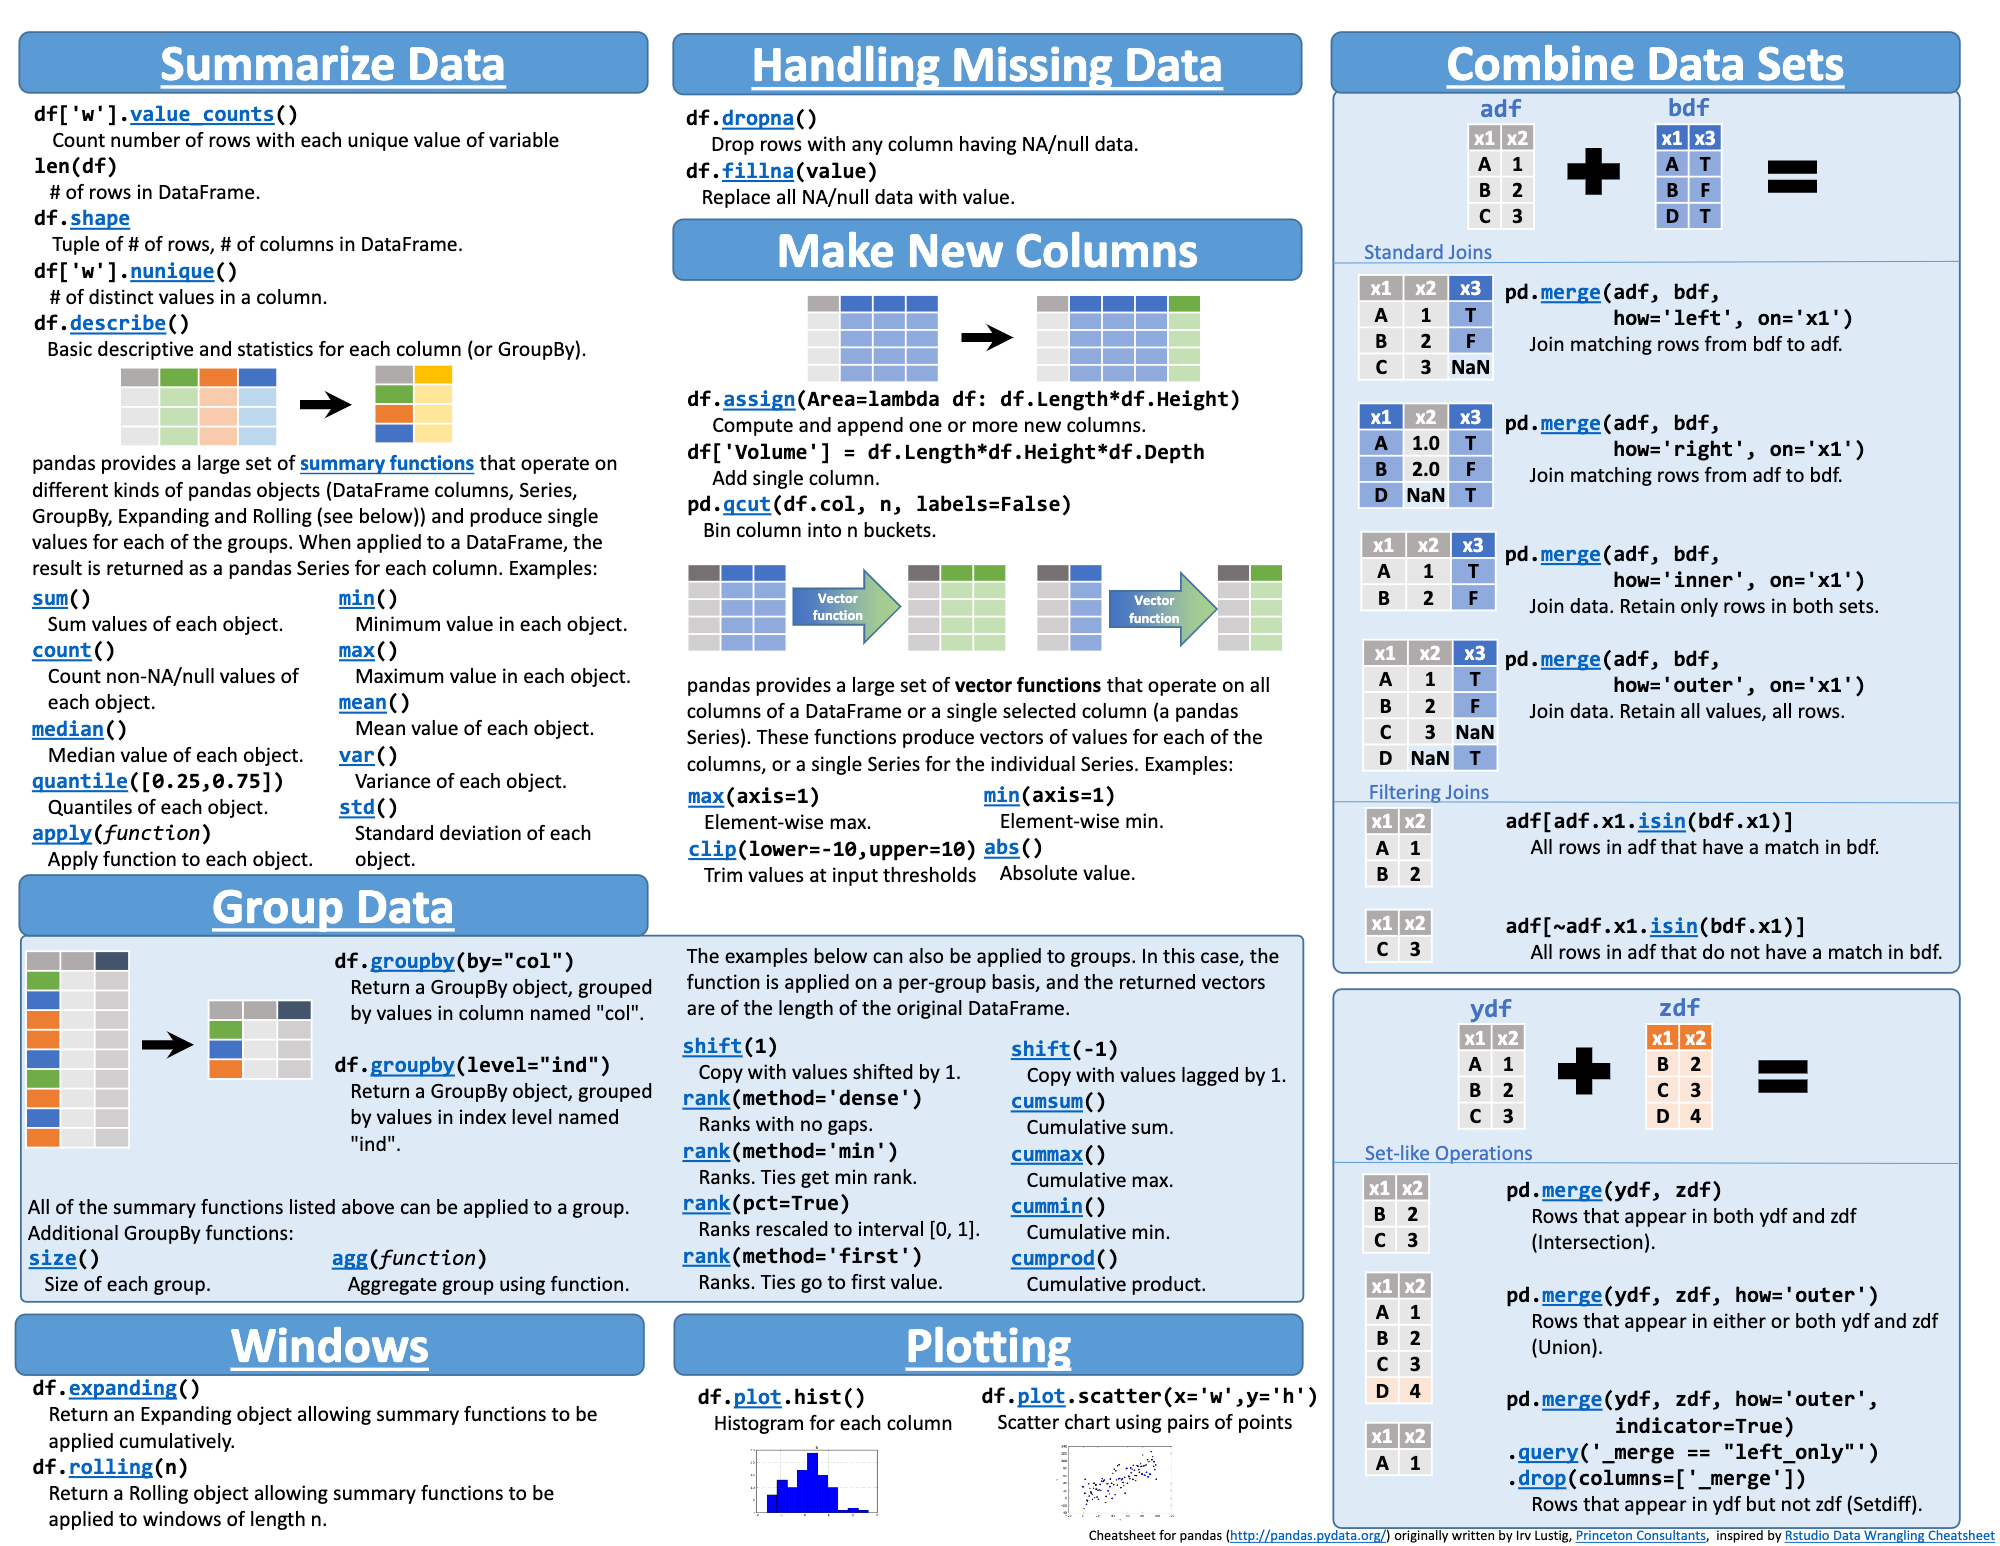

In [1]:
import pandas as pd
import numpy as np

# Define a ndarray
d = np.array([[0.1,0.3,0.4,0.5],[0.3,0.4,0.9,0.5],[0.2,0.8,0.7,0.5]], dtype=float, order='F')
print("Define sample word vectors")
print(d)

#Construct a dataframe from ndarray and index each row as word vectors
df = pd.DataFrame(d,index = ['word1','word2','word3'])
print("\nPandas Data Frame for word vectors")
print(df)

#Select word vector1 by its label
print("\nFind the row corresponding to word1")
print(df.loc['word1'])

#Calculate dot product of word vector1 and word vector2
print("\nCalculate the dot product between word1 and word2")
dot_product = df.loc['word2'].dot(df.loc['word1'])
print(dot_product)

#Calculate dot product of word vector1 to the rest of words
print("\nCalculate the dot product between word1 and rest of the words")
words_rest = ['word2','word3']
dot_product2 = df.loc[words_rest].dot(df.loc['word1'])
print(dot_product2)

#Sort Values of dot_product2 by high to low
print("\nSorted dot product values")
print(dot_product2.sort_values(ascending = False))

Define sample word vectors
[[0.1 0.3 0.4 0.5]
 [0.3 0.4 0.9 0.5]
 [0.2 0.8 0.7 0.5]]

Pandas Data Frame for word vectors
         0    1    2    3
word1  0.1  0.3  0.4  0.5
word2  0.3  0.4  0.9  0.5
word3  0.2  0.8  0.7  0.5

Find the row corresponding to word1
0    0.1
1    0.3
2    0.4
3    0.5
Name: word1, dtype: float64

Calculate the dot product between word1 and word2
0.76

Calculate the dot product between word1 and rest of the words
word2    0.76
word3    0.79
dtype: float64

Sorted dot product values
word3    0.79
word2    0.76
dtype: float64


## Dataset Details - Standford's GloVe pre-trained word vectors

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus. The GloVe pre-trained word vectors dataset contains English word vectors pre-trained on the combined Wikipedia 2014 + Gigaword 5th Edition corpora (6B tokens, 400K vocab). All tokens are in lowercase. This dataset contains 50-dimensional, 100-dimensional and 200-dimensional pre trained word vectors. In this problem we are going to use the 50-dimensional dataset. 

## \# 0. Get an overview on what Glove is
Read up the documentation on glove embeddings, esp. where it gets applied here: https://nlp.stanford.edu/projects/glove/

#GloVe: Global Vectors for Word Representation

###Jeffrey Pennington,   Richard Socher,   Christopher D. Manning


###**Introduction**

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

###**Getting started (Code download)**



*   Download the latest latest code (licensed under the Apache License, Version 2.0).

*   Look for "Clone or download"
*   Unpack the files:  unzip master.zip
*   Compile the source:  cd GloVe-master && make
*   Run the demo script: ./demo.sh
*   Consult the included README for further usage details, or ask a question


###**Download pre-trained word vectors**

*   Pre-trained word vectors. This data is made available under the Public Domain Dedication and License v1.0 whose full text can be found at: http://www.opendatacommons.org/licenses/pddl/1.0/.
*   Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip
*   Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip
*   Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip
*   Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip
*   Ruby script for preprocessing Twitter data

###**Citing GloVe**

Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]

###**Highlights**

1.   **Nearest neighbors**

The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words. Sometimes, the nearest neighbors according to this metric reveal rare but relevant words that lie outside an average human's vocabulary. For example, here are the closest words to the target word frog:

0. frog
1. frogs
2. toad
3. litoria
4. leptodactylidae
5. rana
6. lizard
7. eleutherodactylus


3. litoria

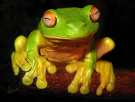

4. leptodactylidae

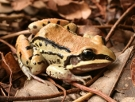

5. rana

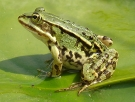

7. eleutherodactylus

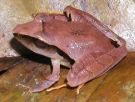
2.   **Linear substructures**

The similarity metrics used for nearest neighbor evaluations produce a single scalar that quantifies the relatedness of two words. This simplicity can be problematic since two given words almost always exhibit more intricate relationships than can be captured by a single number. For example, man may be regarded as similar to woman in that both words describe human beings; on the other hand, the two words are often considered opposites since they highlight a primary axis along which humans differ from one another.


In order to capture in a quantitative way the nuance necessary to distinguish man from woman, it is necessary for a model to associate more than a single number to the word pair. A natural and simple candidate for an enlarged set of discriminative numbers is the vector difference between the two word vectors. GloVe is designed in order that such vector differences capture as much as possible the meaning specified by the juxtaposition of two words.

man - woman

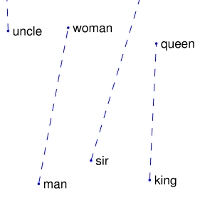

company - ceo

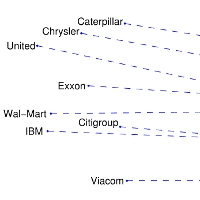

city - zip code

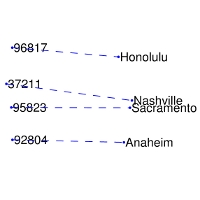

comparative - superlative

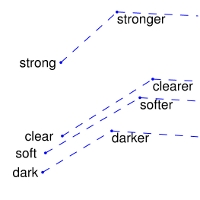



The underlying concept that distinguishes man from woman, i.e. sex or gender, may be equivalently specified by various other word pairs, such as king and queen or brother and sister. To state this observation mathematically, we might expect that the vector differences man - woman, king - queen, and brother - sister might all be roughly equal. This property and other interesting patterns can be observed in the above set of visualizations.

###**Training**

The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Populating this matrix requires a single pass through the entire corpus to collect the statistics. For large corpora, this pass can be computationally expensive, but it is a one-time up-front cost. Subsequent training iterations are much faster because the number of non-zero matrix entries is typically much smaller than the total number of words in the corpus.


The tools provided in this package automate the collection and preparation of co-occurrence statistics for input into the model. The core training code is separated from these preprocessing steps and can be executed independently.

###**Model Overview**

GloVe is essentially a log-bilinear model with a weighted least-squares objective. The main intuition underlying the model is the simple observation that ratios of word-word co-occurrence probabilities have the potential for encoding some form of meaning. For example, consider the co-occurrence probabilities for target words ice and steam with various probe words from the vocabulary. Here are some actual probabilities from a 6 billion word corpus:

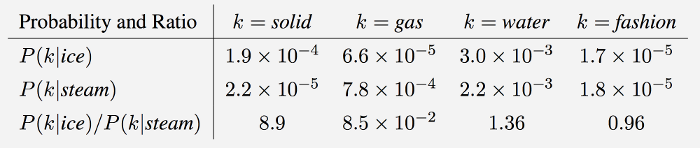

As one might expect, ice co-occurs more frequently with solid than it does with gas, whereas steam co-occurs more frequently with gas than it does with solid. Both words co-occur with their shared property water frequently, and both co-occur with the unrelated word fashion infrequently. Only in the ratio of probabilities does noise from non-discriminative words like water and fashion cancel out, so that large values (much greater than 1) correlate well with properties specific to ice, and small values (much less than 1) correlate well with properties specific of steam. In this way, the ratio of probabilities encodes some crude form of meaning associated with the abstract concept of thermodynamic phase.

The training objective of GloVe is to learn word vectors such that their dot product equals the logarithm of the words' probability of co-occurrence. Owing to the fact that the logarithm of a ratio equals the difference of logarithms, this objective associates (the logarithm of) ratios of co-occurrence probabilities with vector differences in the word vector space. Because these ratios can encode some form of meaning, this information gets encoded as vector differences as well. For this reason, the resulting word vectors perform very well on word analogy tasks, such as those examined in the word2vec package.

###**Visualization**

GloVe produces word vectors with a marked banded structure that is evident upon visualization:
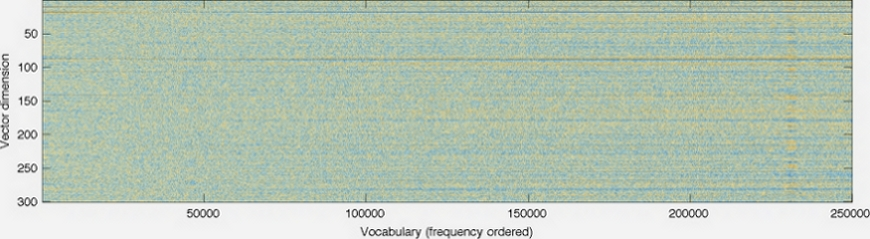

The horizontal bands result from the fact that the multiplicative interactions in the model occur component-wise. While there are additive interactions resulting from a dot product, in general there is little room for the individual dimensions to cross-pollinate.


The horizontal bands become more pronounced as the word frequency increases. Indeed, there are noticeable long-range trends as a function of word frequency, and they are unlikely to have a linguistic origin. This feature is not unique to GloVe -- in fact, I'm unaware of any model for word vector learning that avoids this issue.


The vertical bands, such as the one around word 230k-233k, are due to local densities of related words (usually numbers) that happen to have similar frequencies.

###**Release history**

GloVe v.1.2: Minor bug fixes in code (memory, off-by-one, errors). Eval code now also available in Python and Octave. UTF-8 encoding of largest data file fixed. Prepared by Russell Stewart and Christopher Manning. Oct 2015.
GloVe v.1.0: Original release. Prepared by Jeffrey Pennington. Aug 2014.

###**Bugs/Issues/Discussion**

**GitHub:** GloVe is on GitHub. For bug reports and patches, you're best off using the GitHub Issues and Pull requests features.

**Google Group:** The Google Group globalvectors can be used for questions and general discussion on GloVe.



## Load Dataset
Let's load the dataset first. Each row is indexed as a word vector. Dimension of word vectors is 50. How many words are there in this dataset? Print a few words and see what they are. You don't need to code anything here, just understand the data structure.

In [3]:
import pandas as pd
import numpy as np

# I added these:
import csv
from csv import QUOTE_NONE
#

# Load GloVe pre-trained vectors 
local_file1="glove.6B.50d.txt" # Make sure this file exists!

# I Changed the 'skip' to True
df = pd.read_csv(local_file1,sep=' ',index_col=0,header=None,engine='python',error_bad_lines=True, quoting=QUOTE_NONE)
print("dataset shape - Rows: %d, Cols: %d" % (df.shape[0], df.shape[1]))
words = list(df.index)
print("print a few words in the dataset:", words[30:40])

dataset shape - Rows: 400000, Cols: 50
print a few words in the dataset: ['be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they']


## \# 1. Print the first few 11 rows of the pandas data frame below (5 points)

In [4]:
# Your code HERE - It should execute as expected! 


# My Code:
df.head(11)


# (Search for a pandas functionality that can help you do this!)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.121700,0.345270,-0.044457,-0.49688,-0.178620,-0.000660,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.442510,0.187850,0.002785,-0.184110,-0.115140,-0.785810
",",0.013441,0.236820,-0.16899,0.409510,0.638120,0.477090,-0.42852,-0.556410,-0.364000,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.227860,0.360340,-0.378180,-0.566570,0.044691,0.303920
.,0.151640,0.301770,-0.16763,0.176840,0.317190,0.339730,-0.43478,-0.310860,-0.449990,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.139310,0.223140,-0.080803,-0.356520,0.016413,0.102160
of,0.708530,0.570880,-0.47160,0.180480,0.544490,0.726030,0.18157,-0.523930,0.103810,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.389880,0.229020,-0.216170,-0.225620,-0.093918,-0.803750
to,0.680470,-0.039263,0.30186,-0.177920,0.429620,0.032246,-0.41376,0.132280,-0.298470,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.197220,0.082279,-0.094340,-0.073297,-0.064699,-0.260440
and,0.268180,0.143460,-0.27877,0.016257,0.113840,0.699230,-0.51332,-0.473680,-0.330750,-0.138340,...,-0.069043,0.368850,0.251680,-0.245170,0.253810,0.136700,-0.311780,-0.632100,-0.250280,-0.380970
in,0.330420,0.249950,-0.60874,0.109230,0.036372,0.151000,-0.55083,-0.074239,-0.092307,-0.328210,...,-0.486090,-0.008027,0.031184,-0.365760,-0.426990,0.421640,-0.116660,-0.507030,-0.027273,-0.532850
a,0.217050,0.465150,-0.46757,0.100820,1.013500,0.748450,-0.53104,-0.262560,0.168120,0.131820,...,0.138130,0.369730,-0.642890,0.024142,-0.039315,-0.260370,0.120170,-0.043782,0.410130,0.179600
"""",0.257690,0.456290,-0.76974,-0.376790,0.592720,-0.063527,0.20545,-0.573850,-0.290090,-0.136620,...,0.030498,-0.395430,-0.385150,-1.000200,0.087599,-0.310090,-0.346770,-0.314380,0.750040,0.970650


## \# 2. Words Similarity

Similar words have similar embeddings (or vector values). We can use cosine similarity i.e. cos(u,v) = u.v/(|u||v|) to measure vector similarity. u.v is dot product of vectors, |u| is L2 norm of u. Remember, we spoke about computing similarity based on cosine-similarity (as another alternative to correlation) in class? (20 points)

1. Normalize matrix df by norm of word vectors. 
1. Define a function to find words similarity to a given word.
1. Use the function defined to find the word in examples that is most similar to "happy".

In [5]:
## YOUR CODE HERE
# 1a. Calculate norm of word vectors
# What would be the dimension of the vector_norm array?
vector_norm = np.linalg.norm(df, axis = 0)
print('vector_norm array: ', vector_norm)

# 1b. Normalize matrix df by norm using .div()
dfn = df.div(vector_norm, axis = 1)
print(dfn)

# 1c. Define a function to find words similar to a given word in a normalized dataframe
def find_word_similarity(word, examples,dataframe):
    # Input: word - one string
    #        examples - List of strings
    #        dataframe - An indexed normalized dataframe

    ## YOUR CODE HERE
    ### Previous Code dataframe.[examples] without loc which made it pass the columns
    ### Where it cant find them it can find the index names instead!
    dot_products = dataframe.loc[examples].dot(dataframe.loc[word])
    ## Sorting the values:
    sorted_dot_products = dot_products.sort_values(ascending = False)

    # Calculate dot product of each word in examples to the given word, sorted by value high to low
    # Once you have the sorted values of dot products (notice because of normalization, the dot product is the cosine similarity!),
    # obtain the words corresponding to the sorted values and call it similar_words
    similar_words = sorted_dot_products.index.tolist()

    # Return words similar to the given word
    return similar_words
    
examples = ["sad", "bad", "evil", "healthy", "ill",
            "beaming", "cheerful", "joyful", "radiant", "glad", "upset",
            "disco", "probably", "hardly", "ephemeral", "close", "cleaning", 
            "maths", "word", "distribution"]

# 3.
# Use above function to calculate examples' similarity to happy (both "happy" and words in examples are in dfn)
print('Find Word Similarity: ', find_word_similarity("happy", examples,dfn))

vector_norm array:  [410.89379449 429.09957175 387.4343208  396.40911903 424.42623861
 424.28469205 447.19734245 397.92956687 409.27861354 407.54447363
 355.58769414 408.3213005  441.97626119 412.15394737 404.32362934
 350.62598344 381.68713112 382.07023308 447.55695641 401.06874877
 407.11576478 375.54878497 383.03246862 372.34622772 386.99248739
 561.74933191 434.66005756 340.32804832 388.03185036 370.40418661
 727.09817344 379.9937143  389.19813847 426.42929496 367.54805844
 340.52692196 338.23146729 381.38305564 391.07673148 388.0825878
 371.20666068 400.21890767 388.2899383  401.71026568 396.92007542
 402.07525375 375.45517987 394.45624217 379.53780878 394.34307244]
                  1         2         3         4         5         6   \
0                                                                        
the         0.001017  0.000582 -0.001064  0.000307  0.000813 -0.000105   
,           0.000033  0.000552 -0.000436  0.001033  0.001503  0.001124   
.           0.000369  0.

In sklean library,there is a cosine_similarity fuction that directly calcualtes vectors similarity (you don't need to normalize vectors first). Let's use this function to calculate similarity again to confirm we get same results. 
For more information, please see here: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [6]:
examples = ["sad", "bad", "evil", "healthy", "ill",
            "beaming", "cheerful", "joyful", "radiant", "glad", "upset",
            "disco", "probably", "hardly", "ephemeral", "close", "cleaning", 
            "maths", "word", "distribution"]

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
similarity2 = pd.DataFrame(cosine_similarity(np.array(df.loc['happy']).reshape(1,50),np.array(df.loc[examples])),columns = examples)
print(similarity2.T)

                     0
sad           0.689063
bad           0.708395
evil          0.452148
healthy       0.640579
ill           0.522978
beaming       0.289510
cheerful      0.575719
joyful        0.555032
radiant       0.134971
glad          0.865877
upset         0.566424
disco         0.324669
probably      0.747581
hardly        0.816272
ephemeral     0.132886
close         0.554029
cleaning      0.246022
maths        -0.011991
word          0.599150
distribution  0.160149


## \# 3. Find nearest neighbourhood

It is helpful to compute the nearest neighbors to a word based on the cosine similarity that we defined earlier, so that given a word we can compute which are the other words which are most similar to it. Sometimes, the nearest neighbors according to this metric reveal overlap of concepts or topics that a word shares. E.g. government might be related to the word politics because they both share topics related to public policy, politicians, parties, elections, etc. The idea is whatever embeddings we are using - word2vec or glove is "hopefully" able to capture these correlations right! (35 points)

1. Define a function to find the top n similar words to a given word. You can use either dot product of vectors or cosine_simialrity function. Note the search space for words is coming from your pandas data frame (so unlike the similarity problem we worked on earlier, we are not restricted to only a few words to search from - the search space here is the entire vocab captured in your data frame).
1. Find 20 nearest neighborhood for words 'duck' and 'animal'.
1. Find neighborhood intersection of 'duck' and 'animal', to find which words are similar to both 'duck' and 'animal'. This is also related to a similarity measure called "Jaccard Similarity" - Read up on this here: https://en.wikipedia.org/wiki/Jaccard_index
1. Comment on the how good the glove embeddings are on finding similar words to a given word using cosine similarity?
1. Use dot product instead of cosine similarity, and discuss about the difference in output.

In [8]:
# define a function to find the top n similar words to a given word in the 'df'

# PART 1
def find_most_similar(df, word, n):
    # INPUT: 
    # df: Given Data frame
    # word: String
    # n: Number of similar words to return
    
    # OUTPUT:
    # the list of similar words to return
    
    ## YOUR CODE HERE
    # define and compute the most similar words
    # Use a similarity measure like cosine similarity (like earlier) to do so
    word = df.loc[word]
    cosine_similarities = df.dot(word) / (np.linalg.norm(df, axis=1) * np.linalg.norm(word))
    most_similar_index = cosine_similarities.argmax()
    cosine_similarities = cosine_similarities.drop(df.index[most_similar_index])
    similar_words = cosine_similarities.sort_values(ascending=False).head(n).index.tolist()

    
    return similar_words



# PART 2
# find top 20 similar words to duck
simil1 = find_most_similar(df, "duck", 20)
print(f"Similar words to duck:\n{simil1}")

# find top 20 similar words to animal
simil2 = find_most_similar(df, "animal", 20)
print(f"Similar words to animal:\n{simil2}")



# PART 3
# find the intersection of simil1 and simil2
#intersection =  (concat function of pandas is helpful here)
#print intersection
#word_labels = ['duck', 'animal'] + list(intersection.index)



# find the intersection of simil1 and simil2
intersection = set(simil1).intersection(set(simil2))

# print intersection
print(f"Intersection of similar words to duck and animal:\n{intersection}")

# create list of word labels
word_labels = ['duck', 'animal'] + list(intersection)
print(f"List of word labels:\n{word_labels}")



Similar words to duck:
['crab', 'lobster', 'lame', 'rabbit', 'pig', 'goose', 'chicken', 'grilled', 'fried', 'shrimp', 'cat', 'dog', 'darkwing', 'goat', 'monkey', 'confit', 'fish', 'bite', 'broiled', 'boar']
Similar words to animal:
['animals', 'bird', 'human', 'dogs', 'pet', 'pig', 'feeding', 'fish', 'insect', 'humans', 'pigs', 'dog', 'elephant', 'found', 'cow', 'birds', 'livestock', 'eating', 'breeding', 'wildlife']
Intersection of similar words to duck and animal:
{'dog', 'pig', 'fish'}
List of word labels:
['duck', 'animal', 'dog', 'pig', 'fish']


## \# 4. Correlations
(This question is more of a reflection and building your intuition on how correlations we spoke in class connects to a real-world data set -  Open ended!)
What are some of the most correlated words from the similarity search you did earlier to the word "happy" and "sad". Likewise, what are some of the most uncorrelated words to "happy" and "sad". Does this make sense? How would you improve the results ? If "happy" were a random variable and "sad" was a random variable - What factors make the correlation between "happy" and "sad" (as you computed above) high? (15 points)

###**Answer to Question 4:**

In the prior inquiry, we calculated the likeness between words in the given content information utilizing cosine similarity, a connection based similarity measure. For instance, we can utilize a similar similarity matrix to discover the most related and unrelated words with "glad" and "miserable." To discover the most connected words with "happy," we can utilize the find_word_similarity function we characterized before and pass "happy" as the word contention. We can then sort the ensuing dot items in descending request and select the top 10 words. 

It is sensible that words like "delighted," "pleased," "glad," "unhappy," "disappointed," and "miserable" are firmly identified with "happy" and "miserable," separately since they are near in importance. Then again, words like "maths," "distribution," and "linguistic" are not firmly identified with feelings, so it bodes well that they are not firmly connected with either "happy" or "sad."

The connection between "happy" and "sad" is strong as they are polar opposite feelings. Whenever one is elevated, the other subsides. To illustrate, if someone is pleased, they are unlikely to be unhappy at the same time. Therefore, the association between "happy" and "sad" mirrors this inverse relationship between the two sentiments.

To achieve better outcomes, we can utilize other similarity metrics, like Jaccard similarity or Euclidean distance, and evaluate how they compare to cosine similarity. Additionally, we can experiment with other preprocessing approaches, such as stemming, lemmatization, and the elimination of stop words, to ascertain if they increase the accuracy of the results.


## \# 5 Word analogies

Suppose you know the word vectors for King, Man and Woman. What is your intuitive answer for the 'riddle', King - Man + Woman = ? 
Let's go through below steps to derive the answer for this 'riddle' using the word embeddings. (20 points)

1. Use vector arithmetic to define a new vector which equals to k - m + w (e.g. king, man and woman combination).
2. Calculate similarity of all the words in the corpus to the new vector and sort them by their similarity high to low. 
3. Return the top n vectors which have the highest similarity to the new vector.
1. Find the answers for the riddles, 
    1. good:bad::up:?
    1. germany:merkel::america:?

Using cosine similarity directly from sklearn 

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def solve_riddle(x, y, a, n, dataframe):
    # calculate the vector of a + y - x, where a, x, y are in dataframe
    cal_vec = dataframe.loc[a] + dataframe.loc[y] - dataframe.loc[x]

    # calculate cosine similarity of words in dataframe to cal_vec, sorted by similarity high to low
    similarity = cosine_similarity(dataframe, [cal_vec]).ravel()
    similarity = pd.Series(abs(similarity), index=dataframe.index).sort_values(ascending=False)

    # return top n words and their similarity scores
    return similarity.iloc[0:n+1]


# Call the solve_riddle function to compute the top answers
print(solve_riddle("man", "woman", "king", 5, df))

# Solve the other two riddles
# good:bad::up:?
print(solve_riddle("good", "bad", "up", 5, df))

# germany:merkel::america:?
print(solve_riddle("germany", "merkel", "america", 5, df))


0
king        0.885983
queen       0.860958
daughter    0.768451
prince      0.764070
throne      0.763497
princess    0.751273
dtype: float64
0
down        0.850167
up          0.818045
falling     0.813844
out         0.792837
dropping    0.782064
off         0.778428
dtype: float64
0
obama        0.694289
barack       0.682594
hillary      0.660910
bush         0.657911
clinton      0.655765
garbarnia    0.653692
dtype: float64
